<a href="https://colab.research.google.com/github/itsabbhii/Training-AIML/blob/main/Students_Performance_in_exams/Students_Performance_in_exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/itsabbhii/Training-AIML.git
%cd Training-AIML/Students_Performance_in_exams/

Cloning into 'Training-AIML'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 169 (delta 54), reused 109 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (169/169), 31.83 MiB | 21.46 MiB/s, done.
Resolving deltas: 100% (54/54), done.
/content/Training-AIML/Students_Performance_in_exams


#**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##**Reading Dataset**

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [7]:
df.shape

(1000, 8)

In [6]:
df.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
#unique values in dataframe
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [12]:
#counts from particular column
df["gender"].value_counts()

,count
gender,
female,518
male,482


In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#**EDA**

In [22]:
print("Categories in gender:", end=" ")
print(df['gender'].unique())

print("Categories in race/ethnicity:", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education:", end=" ")
print(df['parental level of education'].unique())

print("Categories in lunch:", end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course:", end=" ")
print(df['test preparation course'].unique())


Categories in gender: ['female' 'male']
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in test preparation course: ['none' 'completed']


In [21]:
#defining features in numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("We have {} numerical features: {}".format(len(numerical_features), numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))
#numerical_features, categorical_features

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


##**Feature Extraction**

In [23]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
reading_full = df[df["reading score"] == 100]['average'].count()
writing_full = df[df["writing score"] == 100]['average'].count()
math_full = df[df["math score"] == 100]['average'].count()
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [25]:
df[df["reading score"]<=20].count()

,0
gender,1
race/ethnicity,1
parental level of education,1
lunch,1
test preparation course,1
math score,1
reading score,1
writing score,1
total score,1
average,1


#***Data Visualization***

##**HISTOGRAM**

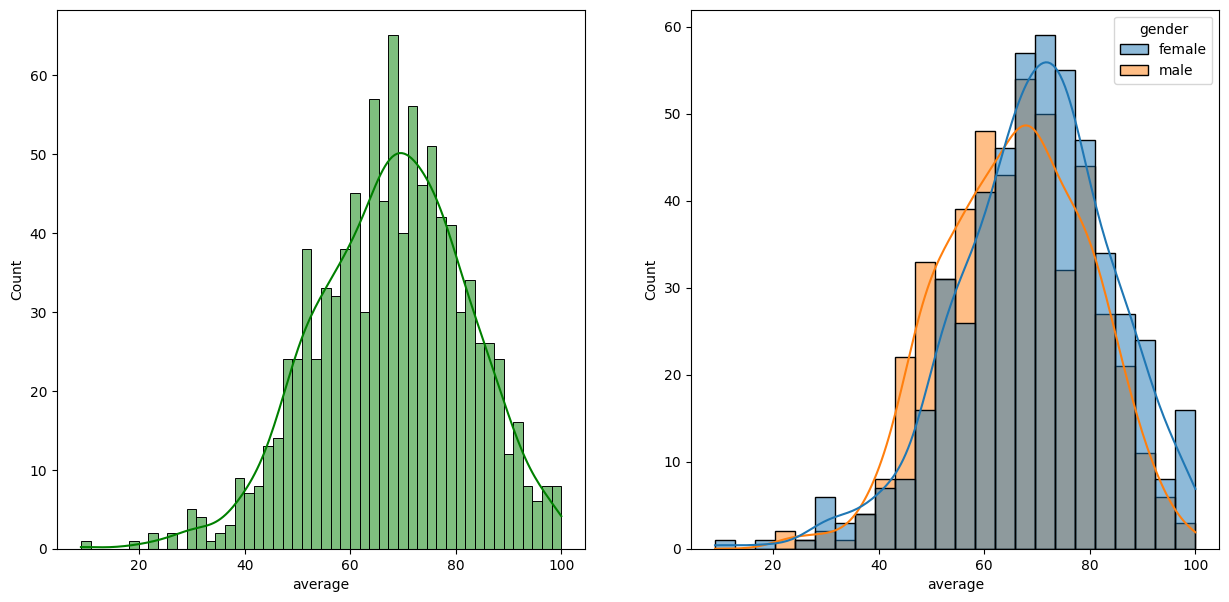

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x="average", bins=50,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x="average", kde=True, hue='gender')
plt.show()